In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('labelled_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0,0704.0062,Tom\'a\v{s} Vina\v{r},"Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",On-line Viterbi Algorithm and Its Relationship...,NaN,Algorithms in Bioinformatics: 7th Internationa...,10.1007/978-3-540-74126-8_23,NaN,cs.DS,NaN,"In this paper, we introduce the on-line Vite...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2010-01-25,"[['Šrámek', 'Rastislav', ''], ['Brejová', 'Bro..."
1,1,0704.0492,Shenghui Su,"Shenghui Su, and Shuwang Lu",Refuting the Pseudo Attack on the REESSE1+ Cry...,"14 pages, and 2 table",NaN,NaN,NaN,cs.CR,http://arxiv.org/licenses/nonexclusive-distrib...,We illustrate through example 1 and 2 that t...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2010-02-04,"[['Su', 'Shenghui', ''], ['Lu', 'Shuwang', '']]"
2,2,0704.0834,Anatoly Rodionov,"Anatoly Rodionov, Sergey Volkov",P-adic arithmetic coding,29 pages,NaN,NaN,NaN,cs.DS,NaN,A new incremental algorithm for data compres...,"[{'version': 'v1', 'created': 'Fri, 6 Apr 2007...",2007-05-23,"[['Rodionov', 'Anatoly', ''], ['Volkov', 'Serg..."
3,3,0704.0858,Mohamed Kaaniche,"Eric Alata (LAAS), Vincent Nicomette (LAAS), M...",Lessons Learned from the deployment of a high-...,NaN,Proc. 6th European Dependable Computing Confer...,NaN,NaN,cs.CR,NaN,This paper presents an experimental study an...,"[{'version': 'v1', 'created': 'Fri, 6 Apr 2007...",2016-08-14,"[['Alata', 'Eric', '', 'LAAS'], ['Nicomette', ..."
4,4,0704.1394,Tarik Had\v{z}i\'c,"Tarik Hadzic, Rune Moller Jensen, Henrik Reif ...",Calculating Valid Domains for BDD-Based Intera...,NaN,NaN,NaN,NaN,cs.AI,NaN,In these notes we formally describe the func...,"[{'version': 'v1', 'created': 'Wed, 11 Apr 200...",2007-05-23,"[['Hadzic', 'Tarik', ''], ['Jensen', 'Rune Mol..."


In [4]:
df_cols = df[['title', 'abstract', 'categories']]

In [5]:
df_cols.shape

(40495, 3)

In [6]:
df_cols.head(5)

,title,abstract,categories
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI


In [7]:
df_final = df_cols

In [8]:
import nltk
nltk.download('wordnet', 'punkt')

[nltk_data] Downloading package wordnet to punkt...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from re import sub, findall, I, MULTILINE
from nltk.tokenize import sent_tokenize

filter_chars = {'¥', '©', '¬', '®', '°', '±', '¼', 'Á', 'Å', 'Æ', 'Ç', 'É', 'Ñ', 'Ó', 'Ö', '×', 'ß', 'à', 'á', 'â', 'ã',
                'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'í',
                'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ú', 'ü', 'ý', 'ā', 'ą', 'ć', 'Č', 'č', 'ē', 'ĕ', 'ė', 'ě',
                'ğ', 'ħ', 'ı', 'ĺ', 'Ł', 'ł', 'ń', 'ņ',
                'ň', 'ō', 'Ř', 'І', 'В', 'С', 'ř', 'ś', 'Ş', 'ş', 'Š', 'š', 'ť', 'ū', 'ŭ', 'ů', 'ų', 'Ż', 'Ž', 'ž', 'ǧ',
                'ǫ', 'ș', 'ə', 'ˆ', 'ˇ', '˙', '˜', '́', '̂', '̃', '̄',
                '̈', 'Γ', 'Δ', 'Θ', 'Λ', 'Π', 'Σ', 'Φ', 'Χ', 'Ψ', 'Ω', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'κ', 'λ',
                'μ', 'ν', 'ξ', 'π', 'ρ', 'σ', 'τ', 'υ',
                'φ', 'χ', 'ψ', 'ω', 'ϑ', 'ϕ', 'ϱ', 'ϵ', 'ḯ', '‖', '†', '…', '‰', '′', '″', '€', '⃖', '⃗', 'ℓ', 'ℜ', '™',
                '←', '↑', '→', '↓', '↦', '⇀', '⇒', '⇔',
                '⇢', '∀', '∂', '∃', '∅', '∆', '∇', '∈', '∉', '∏', '∑', '∘', '∙', '∝', '∞', '∠', '∣', '∥', '∧', '∨', '∩',
                '∪', '∫', '∭', '∼', '≃', '≅', '≈', '≔', '≜',
                '≠', '≡', '≤', '≥', '≪', '≫', '≲', '≳', '⊂', '⊆', '⊕', '⊖', '⊗', '⊙', '⋀', '⋁', '⋂', '⋃', '⋅', '⋆', '⋒',
                '⋮', '⋯', '⌊', '⌋', '□', '△', '▽', '♯',
                '✔', '➔', '⟶', '⟹', '⩽', '⩾', '⪰', '〈', '〉', '丙', '东', '作', '六', '务', '印', '厂', '合', '塘', '大',
                '子', '宁', '宅', '宝', '宫', '尚', '局',
                '峰', '府', '建', '承', '汪', '浦', '船', '药', '路', '辰', '铜', '食', '︷', '︸', '＋', '−', '{', '}',
                'ˆ', ':', '[', ']', '+', '=', '*', '<', '>', '^', '/', '-', '–', '&', '#'}


def preprocessed_text(txt: str, keep_parenthesis=False) -> str:
    # Remove links, if any
    txt = sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*', '', txt, flags=MULTILINE)

    # Remove references, if any
    txt = sub(r'\s\([A-Z][a-z]+,\s[A-Z][a-z]?\.[^\)]*,\s\d{4}\)', '', txt)

    # Replace multiple spaces with a single space
    txt = sub(r' +', ' ', txt, flags=I)

    # '. singlelowercasechar' -> '.singlelowercasechar'
    txt = sub(r'(?<=[\.])\s+(?=(?:[a-z|[0-9]))', '', txt)

    # Converting patterns: ab.a -> ab a,   b.1 -> b 1,   A.F -> A F,   word.something -> word something
    for pattern in findall(r'[a-zA-Z]\.[a-zA-Z0-9]', txt):
        txt = txt.replace(pattern, f"{pattern.split('.')[0]} {pattern.split('.')[1]}")

    if not keep_parenthesis:
        # Removing parenthesis
        final_txt = sub(r'\(.*?\)', ' ', txt)
        
        punctuation = "\"#$&\'()-/:;@[\\]_`~'“”´ʼ‘’{|}+*^=><−"

    else:
        # Removing parenthesis with no alpha numeric character except (abcijkmnpqrtxy)
        final_txt = sub(r'\(([0-9+-/*^><=&$#@%.,!{} abcijkmnpqrtxyABCIJKMNPQRTXY]*)\)', ' ', txt)
        
        punctuation = "\"#$&\'-/:;@\\_`~'“”´ʼ‘’{|}[]+*^=><−"

    # Removes punctuation
    final_txt = ''.join([c if c not in punctuation and c not in filter_chars else ' ' for c in final_txt])
    
    # Removing extra spaces
    final_txt = sub(r' +', ' ', final_txt, flags=I)

    return final_txt

In [10]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_title'] = df_final['title'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_title'] = df_final['tidy_title'].str.lower()

# running the code for necessary pre processing
df_final['tidy_title'] = np.vectorize(preprocessed_text)(df_final['tidy_title'])

In [11]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_abstract'] = df_final['abstract'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_abstract'] = df_final['tidy_abstract'].str.lower()

# running the code for necessary pre processing
df_final['tidy_abstract'] = np.vectorize(preprocessed_text)(df_final['tidy_abstract'])

In [12]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and its relationship...,in this paper we introduce the on line viterb...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the co...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compress...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lessons learned from the deployment of a high ...,this paper presents an experimental study and...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domains for bdd based intera...,in these notes we formally describe the funct...


In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Peforming Lemmatization on title
from nltk.stem import WordNetLemmatizer

tokenized_title = df_final['tidy_title'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_title = tokenized_title.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_title)):
    tokenized_title[i] = " ".join(tokenized_title[i])
    
df_final['tidy_title'] = tokenized_title

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df_final.head(5)

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterb...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the co...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compress...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lesson learned from the deployment of a high i...,this paper presents an experimental study and...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domain for bdd based interac...,in these notes we formally describe the funct...


In [15]:
tokenized_abstract = df_final['tidy_abstract'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_abstract = tokenized_abstract.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_abstract)):
    tokenized_abstract[i] = " ".join(tokenized_abstract[i])
    
df_final['tidy_abstract'] = tokenized_abstract

In [16]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterbi...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the con...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compressi...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lesson learned from the deployment of a high i...,this paper present an experimental study and t...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domain for bdd based interac...,in these note we formally describe the functio...


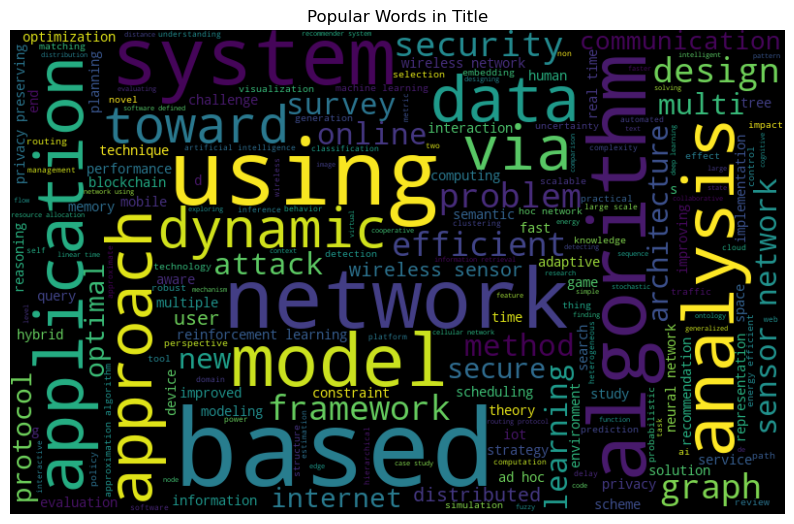

In [17]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df_final['tidy_title']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Popular Words in Title")
plt.axis('off') 
plt.show()

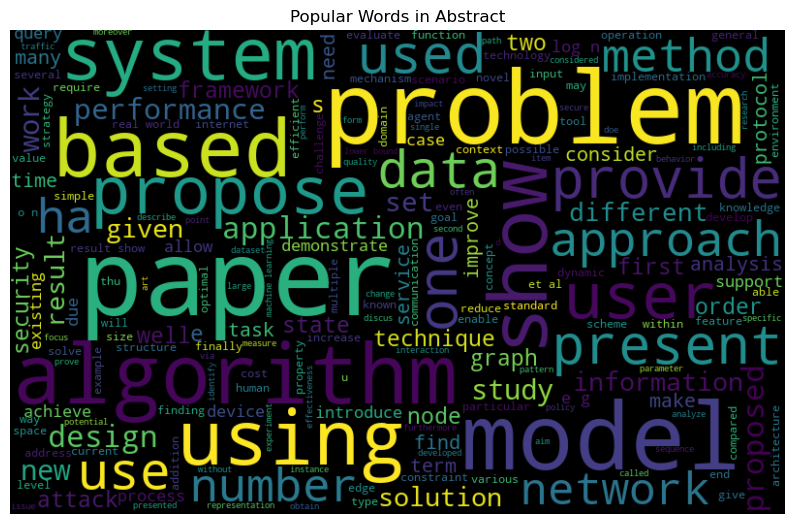

In [18]:
all_words = ' '.join([text for text in df_final['tidy_abstract']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Popular Words in Abstract")
plt.axis('off') 
plt.show()

In [19]:
df_final['title'] = df_final['tidy_title']
df_final['abstract'] = df_final['tidy_abstract']

In [20]:
df_final.drop('tidy_title', axis=1, inplace=True)

In [21]:
df_final.drop('tidy_abstract', axis=1, inplace=True)

In [22]:
df_final.head(5)

,title,abstract,categories
0,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterbi...,cs.DS
1,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the con...,cs.CR
2,p adic arithmetic coding,a new incremental algorithm for data compressi...,cs.DS
3,lesson learned from the deployment of a high i...,this paper present an experimental study and t...,cs.CR
4,calculating valid domain for bdd based interac...,in these note we formally describe the functio...,cs.AI


In [23]:
df_final['categories'].value_counts()

cs.CR    8814
cs.NI    8811
cs.AI    8005
cs.DS    7116
cs.HC    3645
cs.IR    2818
cs.AR    1286
Name: categories, dtype: int64

<AxesSubplot:xlabel='categories', ylabel='count'>

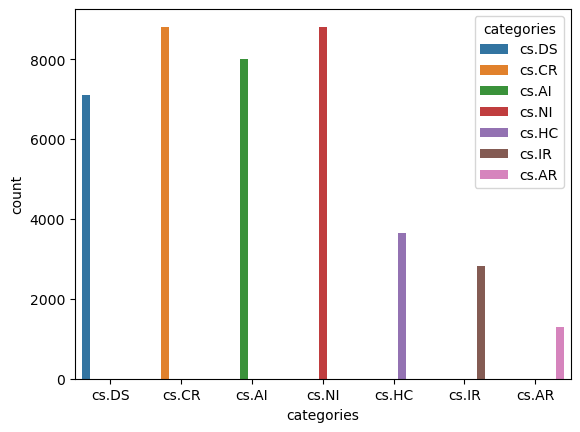

In [24]:
import seaborn as sns

sns.countplot(data=df_final, x='categories', hue='categories')

In [25]:
df_labelled = df_final.groupby('categories').head(1000).reset_index(drop=True)

In [26]:
df_labelled['categories'].value_counts()

cs.DS    1000
cs.CR    1000
cs.AI    1000
cs.NI    1000
cs.HC    1000
cs.IR    1000
cs.AR    1000
Name: categories, dtype: int64

<AxesSubplot:xlabel='categories', ylabel='count'>

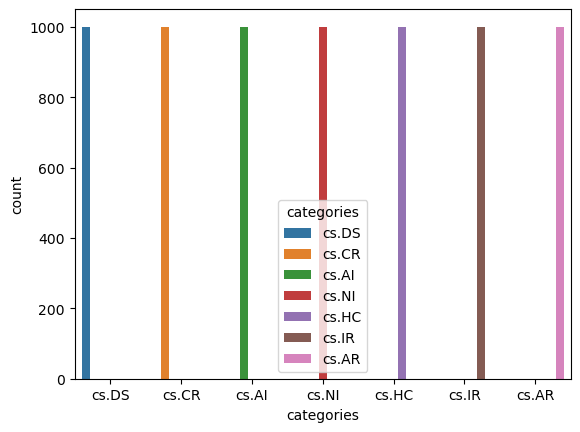

In [27]:
sns.countplot(data=df_labelled, x='categories', hue='categories')

In [28]:
# Combining title and abstract

df_labelled['text'] = df_labelled[['title', 'abstract']].agg(' '.join, axis=1)

In [29]:
df_labelled.drop('title', axis=1, inplace=True)
df_labelled.drop('abstract', axis=1, inplace=True)

In [30]:
df_labelled.head(5)

,categories,text
0,cs.DS,on line viterbi algorithm and it relationship ...
1,cs.CR,refuting the pseudo attack on the reesse crypt...
2,cs.DS,p adic arithmetic coding a new incremental alg...
3,cs.CR,lesson learned from the deployment of a high i...
4,cs.AI,calculating valid domain for bdd based interac...


In [31]:
cols = list(df_labelled.columns)
cols.reverse()

df_final = df_labelled[cols]

In [32]:
df_final.head(5)

,text,categories
0,on line viterbi algorithm and it relationship ...,cs.DS
1,refuting the pseudo attack on the reesse crypt...,cs.CR
2,p adic arithmetic coding a new incremental alg...,cs.DS
3,lesson learned from the deployment of a high i...,cs.CR
4,calculating valid domain for bdd based interac...,cs.AI


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
bow_vector = CountVectorizer(stop_words='english')
bow = bow_vector.fit_transform(df_final['text'])
print(bow.shape)

(7000, 21906)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow, df_final['categories'], train_size = 0.80, stratify=df_final['categories'], random_state=42)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8757142857142857


In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8821428571428571


In [39]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='lbfgs', max_iter=1000)

lg.fit(X_train,y_train)
pred = lg.predict(X_test)

print(accuracy_score(y_test, pred))

0.8814285714285715


In [40]:
abstract = [
    "We present a new approximation algorithm for the (metric) prize-collecting traveling salesperson problem (PCTSP). In PCTSP, opposed to the classical traveling salesperson problem (TSP), one may not include a vertex of the input graph in the returned tour at the cost of a given vertex-dependent penalty, and the objective is to balance the length of the tour and the incurred penalties for omitted vertices by minimizing the sum of the two. We present an algorithm that achieves an approximation guarantee of 1.774 with respect to the natural linear programming relaxation of the problem. This significantly reduces the gap between the approximability of classical TSP and PCTSP, beating the previously best known approximation factor of 1.915. As a key ingredient of our improvement, we present a refined decomposition technique for solutions of the LP relaxation, and show how to leverage components of that decomposition as building blocks for our tours."
]

In [41]:
vect = bow_vector.transform(abstract).toarray()
my_prediction = lg.predict(vect)
print(my_prediction)

['cs.DS']


### Implementation of TFIDF based vector embedding 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

bow_vector_tfidf = TfidfVectorizer(stop_words='english')
bow_tfidf = bow_vector_tfidf.fit_transform(df_final['text'])
print(bow_tfidf.shape)

(7000, 21906)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow_tfidf, df_final['categories'], train_size = 0.80, stratify=df_final['categories'], random_state=42)

In [44]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8942857142857142


In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8771428571428571


In [46]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='lbfgs', max_iter=1000)

lg.fit(X_train,y_train)
pred = lg.predict(X_test)

print(accuracy_score(y_test, pred))

0.8885714285714286


### Implementation of Word2Vec

In [76]:
df_labelled.head(5)

,categories,text
0,cs.DS,on line viterbi algorithm and it relationship ...
1,cs.CR,refuting the pseudo attack on the reesse crypt...
2,cs.DS,p adic arithmetic coding a new incremental alg...
3,cs.CR,lesson learned from the deployment of a high i...
4,cs.AI,calculating valid domain for bdd based interac...


In [86]:
# This is a copy of original dataframe and will be used for implementation of Word2Vec
df_emb3 = df_labelled

In [87]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = df_emb3['text'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

CountVectorizedData['Priority'] = df_emb3['categories']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(7000, 21907)


,aa,aaa,aaai,aag,aagl,aaim,aamrp,aapsm,aardal,aarf,...,zun,zur,zusammengesetzten,zuse,zuylen,zwei,zwick,zxyz,zynq,Priority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cs.DS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cs.CR
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cs.DS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cs.CR
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cs.AI


In [50]:
#Installing the gensim library required for word2Vec and Doc2Vec
!pip install gensim

In [88]:
import gensim


#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,)

In [89]:
# Creating the list of words which are present in the Document term matrix
WordsVocab = CountVectorizedData.columns[:-1]

In [90]:
# Defining a function which takes text input and returns one vector for each sentence

def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    
    CountVecData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):
 
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i,:] >= 1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))

    return(W2Vec_Data)

In [91]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data = FunctionText2Vec(df_emb3['text'])
 
# Checking the new representation for sentences
W2Vec_Data.shape

(7000, 300)

In [92]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)

W2Vec_Data['Priority'] = CountVectorizedData['Priority']
 
# Assigning to DataForML variable
DataForML = W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Priority
0,-0.014767,0.835052,-0.070724,6.490265,-5.211121,-2.495987,3.125603,-2.992767,5.892517,2.304016,...,4.771362,-4.021374,3.258575,-2.085800,-0.259922,-1.169537,-1.789703,1.081276,-0.209877,cs.DS
1,1.545135,-0.864174,-1.894928,2.914055,-6.320770,2.478485,6.762360,-3.781464,6.704842,5.361145,...,4.097198,-4.560730,0.620804,-4.283623,-2.542908,0.459244,-5.019573,-0.548843,0.994141,cs.CR
2,0.853531,1.241093,1.919540,5.231506,-3.274799,0.194397,2.755615,-3.899564,2.077393,3.310303,...,1.644775,-1.445007,-0.104370,0.707581,0.178879,-0.108574,-2.482880,-0.855438,2.139252,cs.DS
3,1.467590,0.164032,-1.921783,1.653393,-2.094788,0.697998,1.518921,-2.215240,3.244263,1.924438,...,0.156494,-0.667175,1.771851,-1.083496,-1.598133,0.046806,-2.652180,-1.663330,-1.462463,cs.CR
4,0.346802,-0.589783,0.112793,0.768188,-1.599060,0.093018,1.002121,-1.789673,2.041138,-0.260498,...,0.478088,0.074341,0.389099,0.720398,0.688080,0.567413,-0.864212,-1.033417,0.087524,cs.AI


In [97]:
from sklearn.preprocessing import StandardScaler

TargetVariable = DataForML.columns[-1]
Predictors = DataForML.columns[:-1]
 
X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

PredictorScaler = StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5600, 300)
(5600,)
(1400, 300)
(1400,)


In [107]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=10000)

# Creating the model on Training Data
LOG = clf.fit(X_train,y_train)
 
# Generating predictions on testing data
prediction = LOG.predict(X_test)

In [105]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

              precision    recall  f1-score   support

       cs.AI       0.64      0.65      0.65       211
       cs.AR       0.86      0.89      0.87       201
       cs.CR       0.81      0.76      0.78       211
       cs.DS       0.70      0.79      0.74       181
       cs.HC       0.80      0.78      0.79       196
       cs.IR       0.86      0.74      0.79       208
       cs.NI       0.73      0.77      0.75       192

    accuracy                           0.77      1400
   macro avg       0.77      0.77      0.77      1400
weighted avg       0.77      0.77      0.77      1400

[[138   2  11  20  19  25   1]
 [  6 178   9   0   3   1   9]
 [  6   5 161   5   4   4  15]
 [ 22  10  13 143   1   6   8]
 [ 17   0   1   0 153  12   8]
 [ 11   1   0   1  10 154   3]
 [ 11   5  16  12   6   6 148]]


In [64]:
def FunctionPredictUrgency(inpText):
    X = FunctionText2Vec(inpText)
    
    X = PredictorScalerFit.transform(X)
    
    # Generating the prediction using Naive Bayes model and returning
    Prediction = LOG.predict(X)
    
    Result = pd.DataFrame(data = inpText, columns=['Text'])
    
    Result['Prediction']=Prediction
    
    return(Result)